<a href="https://colab.research.google.com/github/LuluW8071/ASR-with-Speech-Sentiment-and-Text-Summarizer/blob/main/Speech_Sentiment_Analysis/Speech_Sentiment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Speech Sentiment EDA and Data Preparation

## 01. Download Datasets


In [2]:
# Download dataset from kaggle
!kaggle datasets download -d uwrfkaggler/ravdess-emotional-speech-audio
!kaggle datasets download -d ejlok1/cremad/
!kaggle datasets download -d ejlok1/toronto-emotional-speech-set-tess
!kaggle datasets download -d ejlok1/surrey-audiovisual-expressed-emotion-savee

Dataset URL: https://www.kaggle.com/datasets/uwrfkaggler/ravdess-emotional-speech-audio
License(s): CC-BY-NC-SA-4.0
100%|███████████████████████████████████████▉| 429M/429M [25:29<00:00, 1.40MB/s]
100%|█████████████████████████████████████████| 429M/429M [25:29<00:00, 294kB/s]
Dataset URL: https://www.kaggle.com/datasets/ejlok1/cremad/versions/
License(s): ODC Attribution License (ODC-By)
100%|████████████████████████████████████████| 451M/451M [07:54<00:00, 1.58MB/s]
100%|█████████████████████████████████████████| 451M/451M [07:54<00:00, 998kB/s]
Dataset URL: https://www.kaggle.com/datasets/ejlok1/toronto-emotional-speech-set-tess
License(s): Attribution-NonCommercial-NoDerivatives 4.0 International (CC BY-NC-ND 4.0)
100%|████████████████████████████████████████| 428M/428M [05:46<00:00, 1.31MB/s]
100%|████████████████████████████████████████| 428M/428M [05:46<00:00, 1.29MB/s]
Dataset URL: https://www.kaggle.com/datasets/ejlok1/surrey-audiovisual-expressed-emotion-savee
License(s): cop

## 02. Extracting & Importing Datasets

In [ ]:
from tqdm.notebook import tqdm
import zipfile
import os

zip_file_paths = [
    'ravdess-emotional-speech-audio.zip',
    'cremad.zip',
    'toronto-emotional-speech-set-tess.zip',
    'surrey-audiovisual-expressed-emotion-savee.zip'
]

extracted_dir = 'dataset/'
os.makedirs(extracted_dir, exist_ok=True)

for zip_path in zip_file_paths:
    with zipfile.ZipFile(zip_path, 'r') as zip_ref:
        files = zip_ref.namelist()
        for file in tqdm(iterable=files, total=len(files), desc=f'Extracting {zip_path}'):
            zip_ref.extract(file, extracted_dir)

print(f"All datasets extracted to {extracted_dir}")

In [1]:
import pandas as pd
import numpy as np
import os

ravdess = 'dataset/audio_speech_actors_01-24/'
ravdess_directory_list = os.listdir(ravdess)

cremad = 'dataset/AudioWAV/'
cremad_directory_list = os.listdir(cremad)

tess = 'dataset/tess toronto emotional speech set data/TESS Toronto emotional speech set data/'
tess_directory_list = os.listdir(tess)

savee = 'dataset/ALL'
savee_directory_list = os.listdir(savee)

### 2.1 RAVDESS

This portion of the RAVDESS contains **1440** files: `60 trials per actor x 24 actors = 1440`. The RAVDESS contains 24 professional actors (12 female, 12 male), vocalizing two lexically-matched statements in a neutral North American accent. Speech emotions includes **calm**, **happy** ,**sad**, **angry**, **fearful**, **surprise**, and **disgust** expressions. Each expression is produced at two levels of emotional intensity (normal, strong), with an additional neutral expression.


File naming convention

Each of the 1440 files has a unique filename. The filename consists of a 7-part numerical identifier (e.g., 03-01-06-01-02-01-12.wav). These identifiers define the stimulus characteristics:

| **Identifier**         | **Description**                                                              | **Values**                                                                        |
|------------------------|------------------------------------------------------------------------------|-----------------------------------------------------------------------------------|
| **Modality**           | The type of stimulus.                                                        | 01 = full-AV, 02 = video-only, 03 = audio-only                                    |
| **Vocal channel**      | The type of vocalization.                                                    | 01 = speech, 02 = song                                                            |
| **Emotion**            | The emotion expressed.                                                       | 01 = neutral, 02 = calm, 03 = happy, 04 = sad, 05 = angry, 06 = fearful, 07 = disgust, 08 = surprised |
| **Emotional intensity**| The intensity of the emotion.                                                | 01 = normal, 02 = strong (not applicable for neutral emotion)                     |
| **Statement**          | The statement spoken.                                                        | 01 = "Kids are talking by the door", 02 = "Dogs are sitting by the door"          |
| **Repetition**         | The repetition of the statement.                                             | 01 = 1st repetition, 02 = 2nd repetition                                          |
| **Actor**              | The identifier of the actor.                                                 | 01 to 24 (Odd numbered actors are male, even numbered actors are female)          |

#### Example Filename Breakdown: `03-01-06-01-02-01-12.wav`

| **Identifier**         | **Value**  | **Description**                     |
|------------------------|------------|-------------------------------------|
| **Modality**           | 03         | Audio-only                          |
| **Vocal channel**      | 01         | Speech                              |
| **Emotion**            | 06         | Fearful                             |
| **Emotional intensity**| 01         | Normal intensity                    |
| **Statement**          | 02         | "Dogs are sitting by the door"      |
| **Repetition**         | 01         | 1st repetition                      |
| **Actor**              | 12         | Actor 12 (Female)                   |


In [2]:
file_emotion = []
file_path = []

for i in ravdess_directory_list:
    # There are 24 diffr. actors in previous directory
    # Extracting files for each actor
    actor = os.listdir(ravdess + i)
    for f in actor:
        part = f.split('.')[0].split('-')
        # Third part in each file represents the emotion associated to that file
        file_emotion.append(int(part[2]))
        file_path.append(ravdess + i + '/' + f)

In [3]:
# Dataframe for emotion of files
emotion_df = pd.DataFrame(file_emotion, columns=['Emotions'])

# Dataframe for path of files
path_df = pd.DataFrame(file_path, columns=['Path'])
ravdess_df = pd.concat([emotion_df, path_df], axis=1)

# Changing integers to actual emotions
# Since Calm and Neutral labels generally denote same thing asssigning label calm as neutral
ravdess_df.Emotions.replace({1:'neutral', 2:'neutral', 3:'happy', 4:'sad', 5:'angry', 6:'fear', 7:'disgust',
                             8:'surprise'},
                            inplace=True)

ravdess_df.Emotions.value_counts()

/tmp/ipykernel_2064530/1399795057.py:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  ravdess_df.Emotions.replace({1:'neutral', 2:'neutral', 3:'happy', 4:'sad', 5:'angry', 6:'fear', 7:'disgust',


Emotions
neutral     288
disgust     192
sad         192
fear        192
happy       192
angry       192
surprise    192
Name: count, dtype: int64

In [4]:
ravdess_df.head()

,Emotions,Path
0,disgust,dataset/audio_speech_actors_01-24/Actor_19/03-...
1,sad,dataset/audio_speech_actors_01-24/Actor_19/03-...
2,fear,dataset/audio_speech_actors_01-24/Actor_19/03-...
3,neutral,dataset/audio_speech_actors_01-24/Actor_19/03-...
4,neutral,dataset/audio_speech_actors_01-24/Actor_19/03-...


### 2.2 CREMA-D

CREMA-D is a data set of **7,442** original clips from 91 actors. These clips were from 48 male and 43 female actors between the ages of 20 and 74 coming from a variety of races and ethnicities (African America, Asian, Caucasian, Hispanic, and Unspecified). Actors spoke from a selection of 12 sentences. The sentences were presented using one of six different emotions (**Anger**, **Disgust**, **Fear**, **Happy**, **Neutral**, and **Sad**) and four different emotion levels (Low, Medium, High, and Unspecified).

In [5]:
file_emotion = []
file_path = []

for file in cremad_directory_list:
    # storing file paths
    file_path.append(cremad + file)
    # storing file emotions
    part=file.split('_')
    if part[2] == 'SAD':
        file_emotion.append('sad')
    elif part[2] == 'ANG':
        file_emotion.append('angry')
    elif part[2] == 'DIS':
        file_emotion.append('disgust')
    elif part[2] == 'FEA':
        file_emotion.append('fear')
    elif part[2] == 'HAP':
        file_emotion.append('happy')
    elif part[2] == 'NEU':
        file_emotion.append('neutral')
    else:
        file_emotion.append('Unknown')

# Create dataframes for emotions and paths
emotion_df = pd.DataFrame(file_emotion, columns=['Emotions'])
path_df = pd.DataFrame(file_path, columns=['Path'])

# Reset index to ensure no duplicate indices
emotion_df.reset_index(drop=True, inplace=True)
path_df.reset_index(drop=True, inplace=True)

In [6]:
# Concatenate dataframes along the columns
Crema_df = pd.concat([emotion_df, path_df], axis=1)

# Check for value counts of emotions
print(Crema_df.Emotions.value_counts())

Emotions
sad        1271
happy      1271
angry      1271
fear       1271
disgust    1271
neutral    1087
Name: count, dtype: int64


### 2.3 TESS

There are a set of **200** target words were spoken in the carrier phrase "Say the word _' by two actresses (aged 26 and 64 years) and recordings were made of the set portraying each of seven emotions (**anger**, **disgust**, **fear**, **happiness**, **pleasant surprise**, **sadness**, and **neutral**). There are 2800 data points (audio files) in total.

The dataset is organised such that each of the two female actor and their emotions are contain within its own folder. And within that, all 200 target words audio file can be found. The format of the audio file is a WAV format.

In [7]:
path_list = []
emotion_list = []

emotion_dic = {
    'happy'   : 'happy',
    'neutral' : 'neutral',
    'sad'     : 'sad',
    'Sad'     : 'sad',
    'angry'   : 'angry',
    'fear'    : 'fear',
    'disgust'  : 'disgust',
    'ps': 'surprise',
}

for directory in tess_directory_list:
    # print(directory)
    audio_files = os.listdir(os.path.join(tess, directory))

    for audio_file in audio_files:
        part = audio_file.split('.')[0]
        # print(part)
        key = part.split('_')[2]
        if key in emotion_dic:
            path_list.append(f"{tess}{directory}/{audio_file}")
            emotion_list.append(emotion_dic[key])

path_list[0:3], emotion_list[0:3]

(['dataset/tess toronto emotional speech set data/TESS Toronto emotional speech set data/YAF_disgust/YAF_yearn_disgust.wav',
  'dataset/tess toronto emotional speech set data/TESS Toronto emotional speech set data/YAF_disgust/YAF_talk_disgust.wav',
  'dataset/tess toronto emotional speech set data/TESS Toronto emotional speech set data/YAF_disgust/YAF_when_disgust.wav'],
 ['disgust', 'disgust', 'disgust'])

In [8]:
tess_df = pd.concat([
    pd.DataFrame(path_list, columns=['Path']),
    pd.DataFrame(emotion_list, columns=['Emotions'])
], axis=1)

tess_df.Emotions.value_counts()

Emotions
disgust     400
surprise    400
angry       400
fear        400
sad         400
neutral     400
happy       400
Name: count, dtype: int64

### 2.4 SAVEE

The SAVEE database was recorded from four native English male speakers (identified as DC, JE, JK, KL), postgraduate students and researchers at the University of Surrey aged from 27 to 31 years. Emotion has been described psychologically in discrete categories: **anger**, **disgust**, **fear**, **happiness**, **sadness** and **surprise**. A neutral category is also added to provide recordings of 7 emotion categories.

The text material consisted of 15 TIMIT sentences per emotion: 3 common, 2 emotion-specific and 10 generic sentences that were different for each emotion and phonetically-balanced. The 3 common and 2 × 6 = 12 emotion-specific sentences were recorded as neutral to give 30 neutral sentences. This resulted in a total of 120 utterances per speaker

In [9]:
savee_dir_list = os.listdir(savee)
path_list = []
gender_list = []
emotion_list = []

emotion_dic = {
    'h'  : 'happy',
    'n'  : 'neutral',
    'sa' : 'sad',
    'a'  : 'angry',
    'f'  : 'fear',
    'd'  : 'disgust'
}

for audio_file in savee_dir_list:
    part = audio_file.split('_')[1]
    key = part[:-6]
    if key in emotion_dic:
        path_list.append(f"{savee}/{audio_file}")
        emotion_list.append(emotion_dic[key])

In [10]:
savee_df = pd.concat([
    pd.DataFrame(path_list, columns=['Path']),
    pd.DataFrame(emotion_list, columns=['Emotions'])
], axis=1)

savee_df.Emotions.value_counts()

Emotions
neutral    120
fear        60
happy       60
disgust     60
sad         60
angry       60
Name: count, dtype: int64

### 2.5 Joining RAVDESS, CREMA-D, TESS & SAVEE Dataset

In [11]:
data_path = pd.concat([ravdess_df, Crema_df, tess_df, savee_df], axis=0)
data_path.reset_index(drop=True, inplace=True)                                      # Reset index
data_path.rename(columns={'Path': 'path', 'Emotions': 'emotion'}, inplace=True)     # Rename the columns
print(data_path.shape)

# Save to CSV file w
data_path.to_csv("audio_file.csv", index=False)

(12102, 2)


In [12]:
data_path.tail(5)

,emotion,path
12097,angry,dataset/ALL/DC_a03.wav
12098,sad,dataset/ALL/JE_sa11.wav
12099,neutral,dataset/ALL/JE_n08.wav
12100,happy,dataset/ALL/JE_h09.wav
12101,angry,dataset/ALL/KL_a04.wav


In [13]:
data_path.emotion.value_counts()

emotion
disgust     1923
sad         1923
fear        1923
happy       1923
angry       1923
neutral     1895
surprise     592
Name: count, dtype: int64

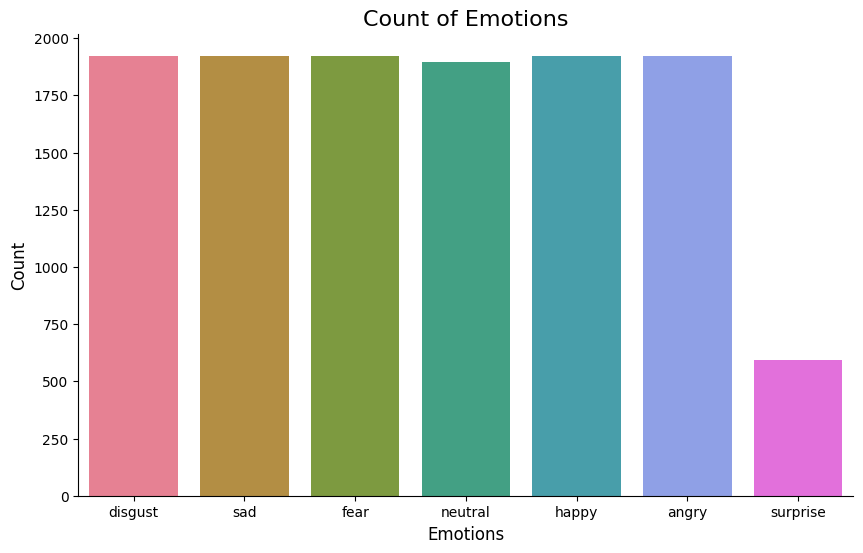

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

palette = sns.color_palette("husl", 7)

# Plot the count of emotions
plt.figure(figsize=(10, 6))
plt.title('Count of Emotions', size=16)
sns.countplot(x='emotion', data=data_path, hue='emotion', palette=palette, legend=False)
plt.ylabel('Count', size=12)
plt.xlabel('Emotions', size=12)
sns.despine(top=True, right=True, left=False, bottom=False)
plt.show()

## 03. EDA & Data Augmentation

In [17]:
import librosa
import librosa.display
import torchaudio
from IPython.display import Audio
from tqdm.auto import tqdm

# Load saved csv file
data_path = pd.read_csv('audio_file.csv')

# Finding sampling rate
data0, sr0 = torchaudio.load(data_path['path'][1])
data1, sr1 = torchaudio.load(data_path['path'][3000])
data2, sr2 = torchaudio.load(data_path['path'][6000])
data3, sr3 = torchaudio.load(data_path['path'][8000])
data4, sr4 = torchaudio.load(data_path['path'][10000])
data5, sr5 = torchaudio.load(data_path['path'][len(data_path)-1])

# Check sample rate of sample audios
sr0, sr1, sr2, sr3, sr4, sr5

(48000, 16000, 16000, 16000, 24414, 44100)

> There are 4 different samples rates. We need to **downsample** every clips to **16Khz** to even out.

### 3.1 Generate Log Mel Spectrogram

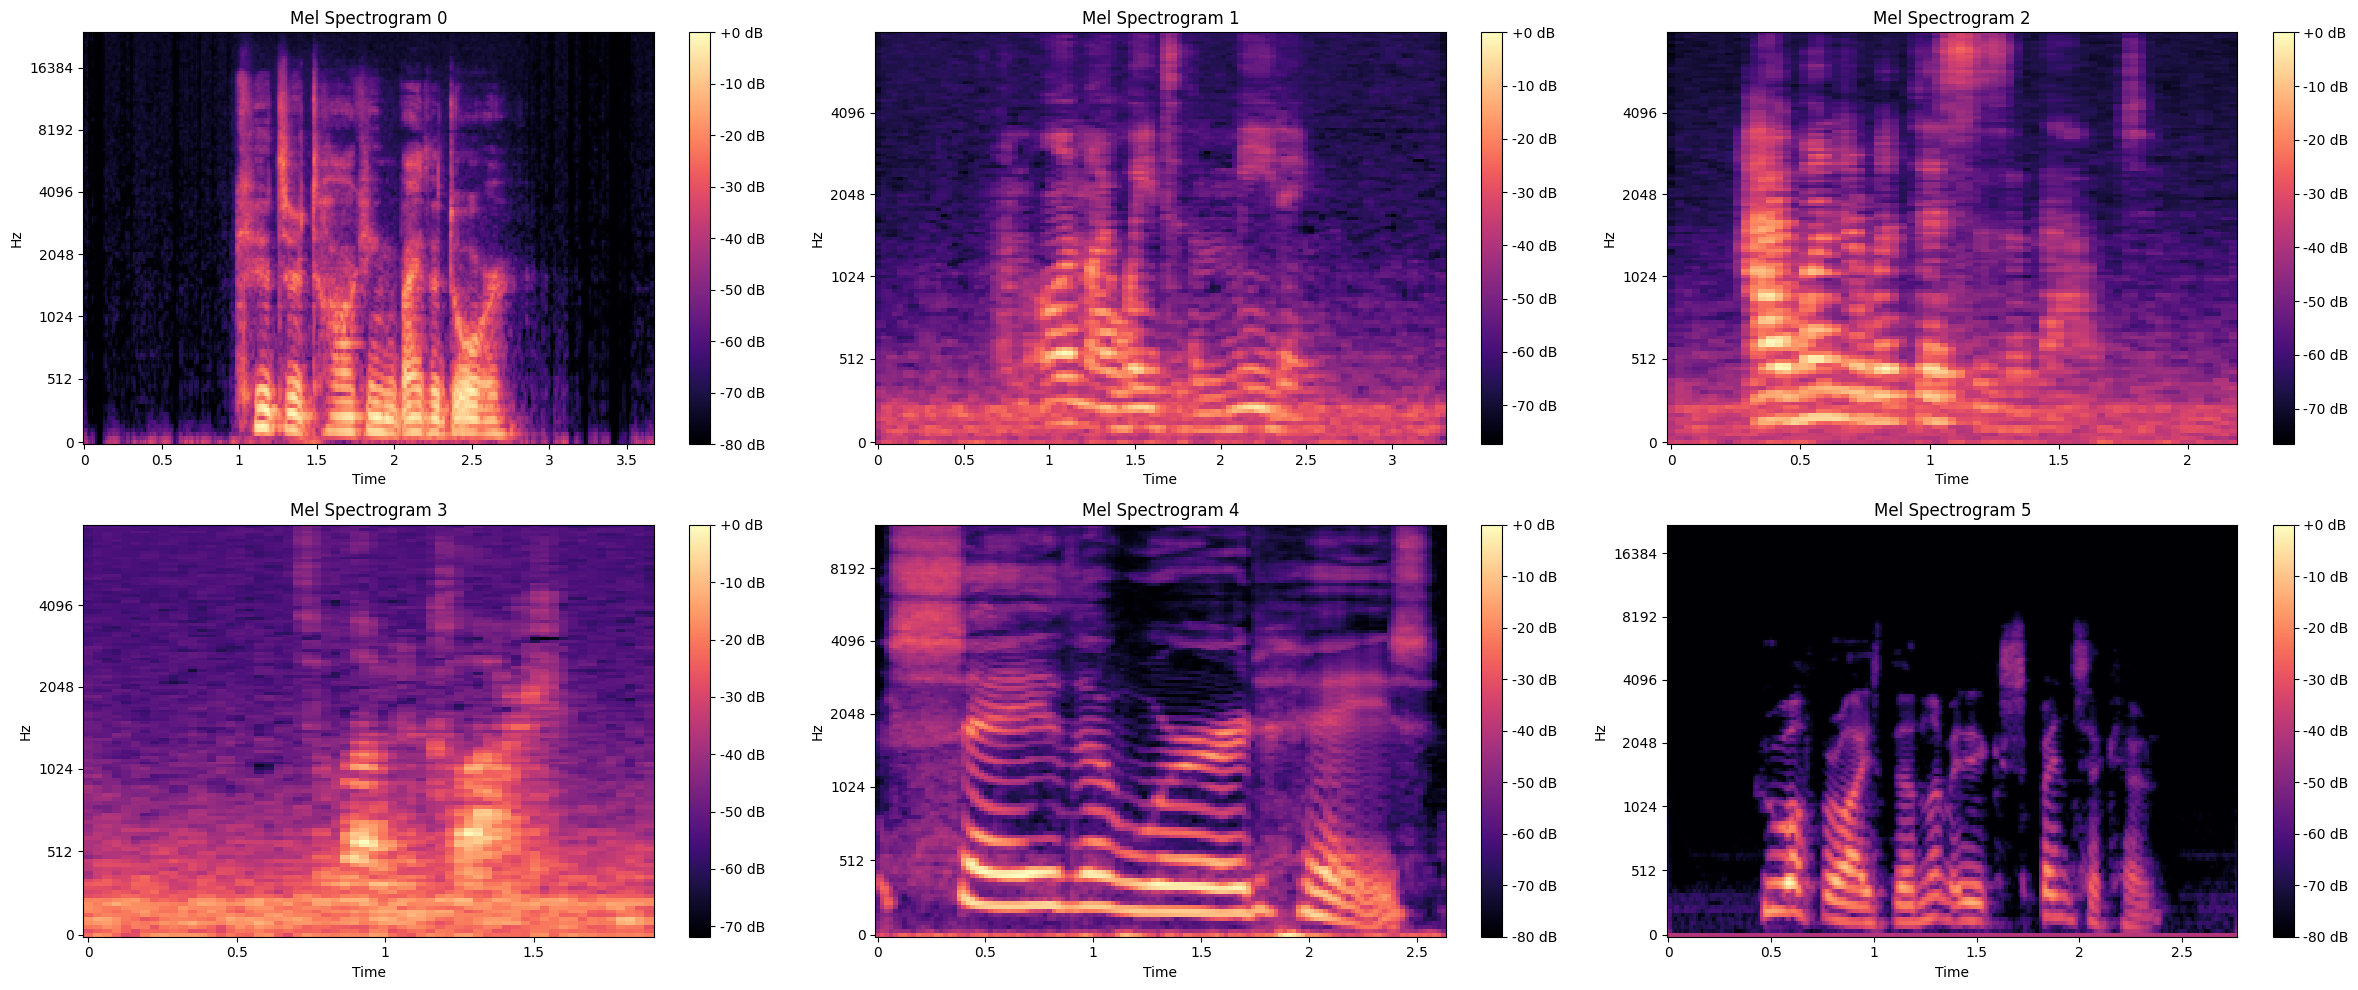

In [18]:
audio_data = [data0, data1, data2, data3, data4, data5]
sample_rates = [sr0, sr1, sr2, sr3, sr4, sr5]

fig, ax = plt.subplots(2, 3, figsize=(24, 10))

for idx, (data, sr) in enumerate(zip(audio_data, sample_rates)):
    data = data.numpy().flatten()

    # Compute Mel spectrogram
    spectrogram = librosa.feature.melspectrogram(y=data, sr=sr, n_mels=128, fmax=sr/2)
    log_spectrogram = librosa.power_to_db(spectrogram, ref=np.max)

    row = idx // 3
    col = idx % 3
    img = librosa.display.specshow(log_spectrogram, sr=sr, x_axis='time', y_axis='mel', ax=ax[row, col])
    ax[row, col].set_title(f'Mel Spectrogram {idx}')
    fig.colorbar(img, ax=ax[row, col], format='%+2.0f dB')

plt.tight_layout()
plt.show()

### 3.2 Add Noise, Stretch, Shift & Pitch shift


- Data augmentation creates new synthetic data by slightly altering our original training data.
- For audio, we can generate new data by adding noise, shifting in time, changing pitch, and adjusting speed.
- The goal is to help our model become more robust to these changes and improve its ability to generalize.
- To be effective, these changes must keep the original label of the training sample.
- For images, data augmentation can involve shifting, zooming, and rotating the image.


In [19]:
def noise(data, noise_rate=0.035):
    noise_amp = noise_rate*np.random.uniform()*np.amax(data)
    data = data + noise_amp*np.random.normal(size=data.shape[0])
    return data

# Reference: https://librosa.org/doc/latest/generated/librosa.effects.time_stretch.html#librosa.effects.time_stretch
def stretch(data, rate=0.8):
    return librosa.effects.time_stretch(y=data, rate=rate)

def shift(data):
    shift_range = int(np.random.uniform(low=-5, high = 5)*1300)
    return np.roll(data, shift_range)

# Reference: https://librosa.org/doc/latest/generated/librosa.effects.pitch_shift.html#librosa.effects.pitch_shift
def pitch(data, sampling_rate, pitch_factor=0.7):
    return librosa.effects.pitch_shift(y=data, sr=sampling_rate, n_steps=pitch_factor)

### 3.2.1 Original Audio Sample

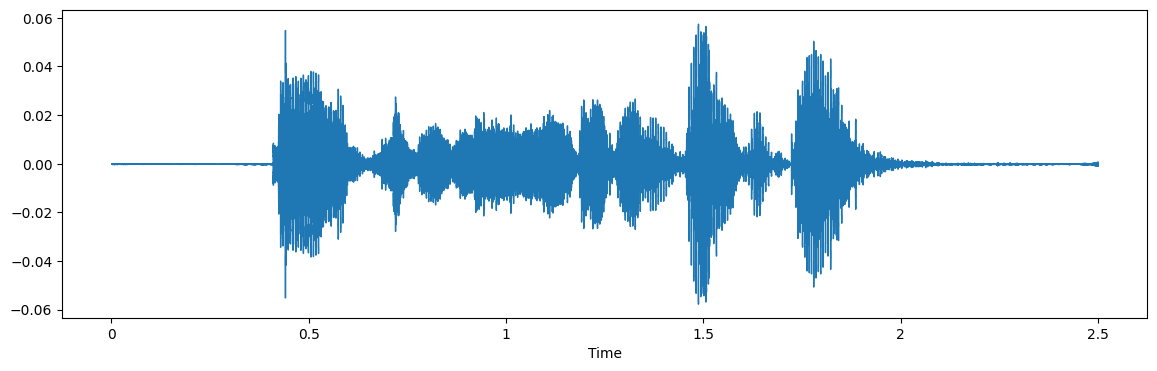

In [20]:
path = np.array(data_path.path)[2]
data, sample_rate = librosa.load(path, duration = 2.5, offset = 0.6)
data, sample_rate = librosa.load(path, sr = None, duration = 2.5, offset = 0.6)

plt.figure(figsize=(14,4))
librosa.display.waveshow(y=data, sr=sample_rate)
Audio(path)

### 3.2.2 Audio sample with noise injection

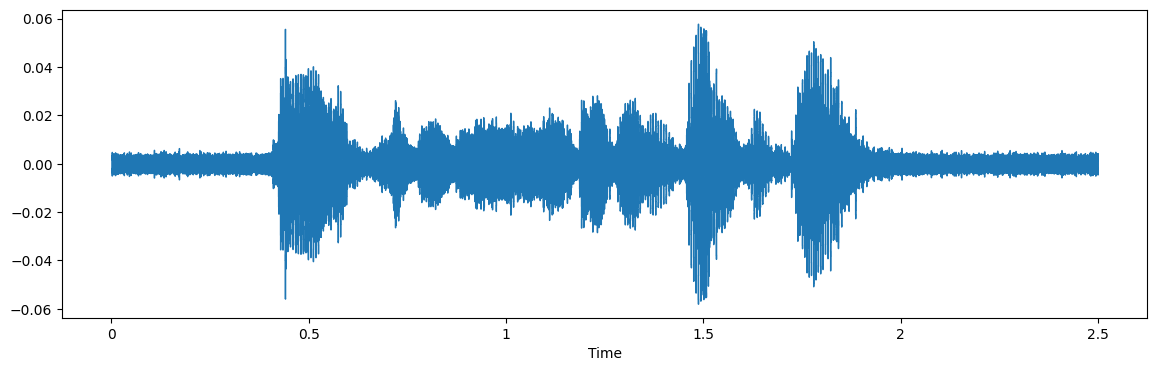

In [21]:
x = noise(data)
plt.figure(figsize=(14,4))
librosa.display.waveshow(y=x, sr=sample_rate)
Audio(x, rate=sample_rate)

### 3.2.3 Audio sample with added stretch

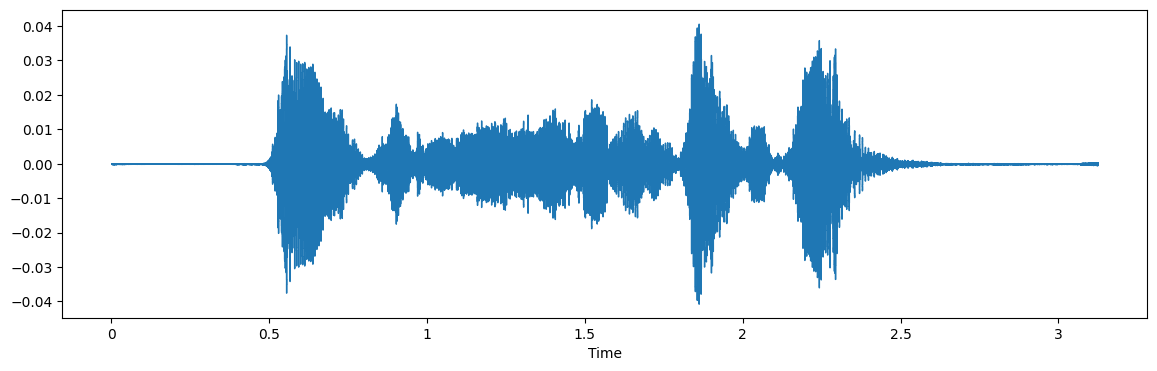

In [22]:
x = stretch(data)
plt.figure(figsize=(14,4))
librosa.display.waveshow(y=x, sr=sample_rate)
Audio(x, rate=sample_rate)

### 3.2.4 Audio sample with added shifting

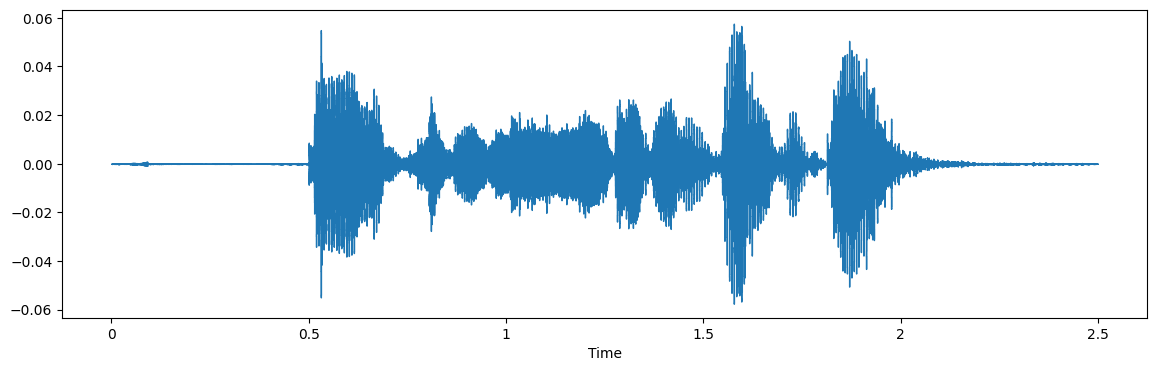

In [23]:
x = shift(data)
plt.figure(figsize=(14,4))
librosa.display.waveshow(y=x, sr=sample_rate)
Audio(x, rate=sample_rate)

### 3.2.5 Audio sample with added pitch shift

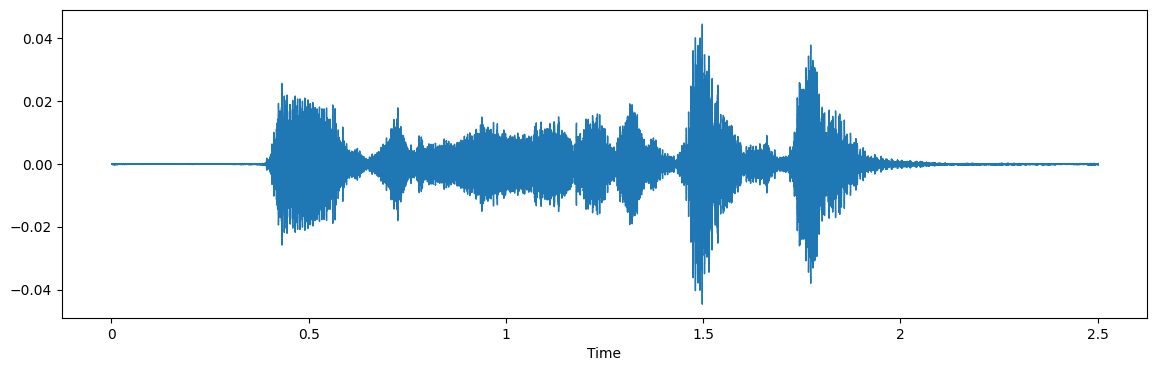

In [24]:
x = pitch(data, sample_rate)
plt.figure(figsize=(14,4))
librosa.display.waveshow(y=x, sr=sample_rate)
Audio(x, rate=sample_rate)

## 4. Downsample and Compress datasets in ZipFile

In [ ]:
!apt-get install sox -y
!pip install sox

In [5]:
%%python src/ASR-with-Speech-Sentiment-Analysis-Text-Summarizer/Speech_Sentiment_Analysis/scripts/upsample.py --file_path="audio_file.csv" --save_csv_path="output/" --num_workers=2

UsageError: %%python is a cell magic, but the cell body is empty.


In [10]:
import zipfile, os
from tqdm import tqdm

# Define the source folder and zip file path
source_folder = 'output'
zip_file_path = 'downsampled_SER_speech.zip'

# Create a zip file
with zipfile.ZipFile(zip_file_path, 'w') as zipf:
    for root, _, files in tqdm(os.walk(source_folder), desc="Zipping files"):
        for file in files:
            file_path = os.path.join(root, file)
            arcname = os.path.relpath(file_path, source_folder)
            zipf.write(file_path, arcname)

print(f"Zip file created at: {zip_file_path}")

Zipping files: 2it [00:02,  1.08s/it]


Zip file created at: downsampled_SER_speech.zip


In [131]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [135]:
!mv downsampled_SER_speech.zip /content/drive/MyDrive/